In [1]:
import shapefile

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize

import geopandas as gpd

import numpy as np
from numpy import *
from mpl_toolkits.basemap import Basemap
from netCDF4 import *

In [2]:

# Open the shapefile using the pyshp library
sf = shapefile.Reader("/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1.shpp")

# Get the shapefile records
records = sf.records()

# Try to print the first two records
print ((records[0:2]))

# Extract province names (I guess the record 4 is the name of the provinces)
province_names = [record[4] for record in records]

# Now check if we extract the correct records :))
print (province_names)


[Record #0: ['VNM.1_1', 'VNM', 'Vietnam', 'An Giang', 'An Giang', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.AG', 'VN-44'], Record #1: ['VNM.7_1', 'VNM', 'Vietnam', 'Bà Rịa - Vũng Tàu', 'Ba Ria - Vung Tau', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.BV', 'NA']]
['An Giang', 'Ba Ria - Vung Tau', 'Bac Giang', 'Bac Kan', 'Bac Lieu', 'Bac Ninh', 'Ben Tre', 'Binh Dinh', 'Binh Duong', 'Binh Phuoc', 'Binh Thuan', 'Ca Mau', 'Can Tho', 'Cao Bang', 'Da Nang', 'Dak Lak', 'Dak Nong', 'Dien Bien', 'Dong Nai', 'Dong Thap', 'Gia Lai', 'Ha Giang', 'Ha Nam', 'Ha Noi', 'Ha Tinh', 'Hai Duong', 'Hai Phong', 'Hau Giang', 'Ho Chi Minh', 'Hoa Binh', 'Hung Yen', 'Khanh Hoa', 'Kien Giang', 'Kon Tum', 'Lai Chau', 'Lam Dong', 'Lang Son', 'Lao Cai', 'Long An', 'Nam Dinh', 'Nghe An', 'Ninh Binh', 'Ninh Thuan', 'Phu Tho', 'Phu Yen', 'Quang Binh', 'Quang Nam', 'Quang Ngai', 'Quang Ninh', 'Quang Tri', 'Soc Trang', 'Son La', 'Tay Ninh', 'Thai Binh', 'Thai Nguyen', 'Thanh Hoa', 'Thua Thien Hue', 'Tien Giang', 'Tra Vinh', 'Tuyen Quan

/tmp/ipykernel_11471/2250183718.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
/tmp/ipykernel_11471/2250183718.py:42: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if poly_shape.type == 'Polygon':
/tmp/ipykernel_11471/2250183718.py:45: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif poly_shape.type == 'MultiPolygon':


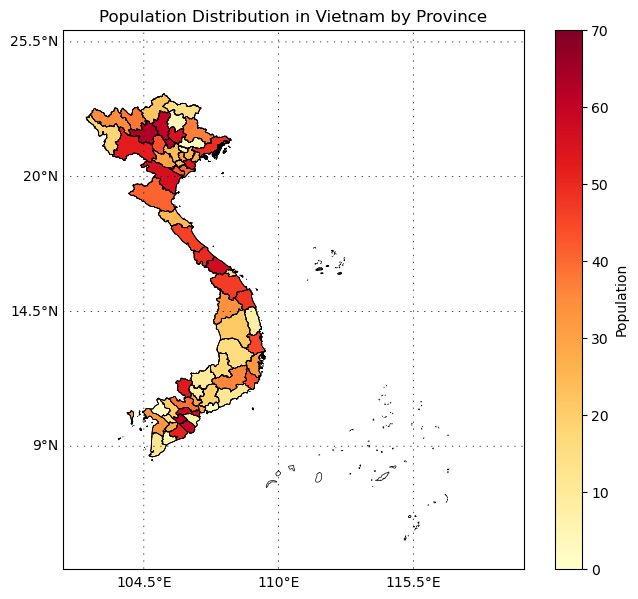

In [3]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from mpl_toolkits.basemap import Basemap

vietnam = gpd.read_file("/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1.shp")
population = np.arange(1, 64 + 1)

norm = Normalize(vmin=0, vmax=70)  # Adjusting color bar from 0 to 70
cmap = cm.get_cmap('YlOrRd')

# Create a figure and axis
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1)

# Basemap boundaries for Vietnam
lon_min = 101.2
lon_max = 120
lat_min = 4
lat_max = 26

# Set up Basemap
map = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
              urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326)

# Draw shapefiles for borders and islands
map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')
map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_0', 'vietnam', linewidth=0.5, color='black')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='black')

for idx, row in vietnam.iterrows():
    poly_shape = row['geometry']
    pop_value = population[idx]
    
    # Get the color based on population value
    color = cmap(norm(pop_value))
    
    # Handle Polygon and MultiPolygon separately
    if poly_shape.type == 'Polygon':
        poly = Polygon(np.array(poly_shape.exterior.coords), facecolor=color, edgecolor='black', linewidth=0.5)
        ax.add_patch(poly)
    elif poly_shape.type == 'MultiPolygon':
        for polygon in poly_shape.geoms:  # Use .geoms to access individual polygons
            poly = Polygon(np.array(polygon.exterior.coords), facecolor=color, edgecolor='black', linewidth=0.5)
            ax.add_patch(poly)

# Add parallels and meridians
parallels = np.arange(-90., 150., np.around((lat_max - lat_min) / 4, decimals=1))
meridians = np.arange(0., 180., np.around((lat_max - lat_min) / 4, decimals=1))
map.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=10, zorder=12)
map.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=10, zorder=12)

# Set the title and labels
ax.set_title('Population Distribution in Vietnam by Province')

# Add color bar for reference
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Population')

# Show the map
plt.show()



ex2

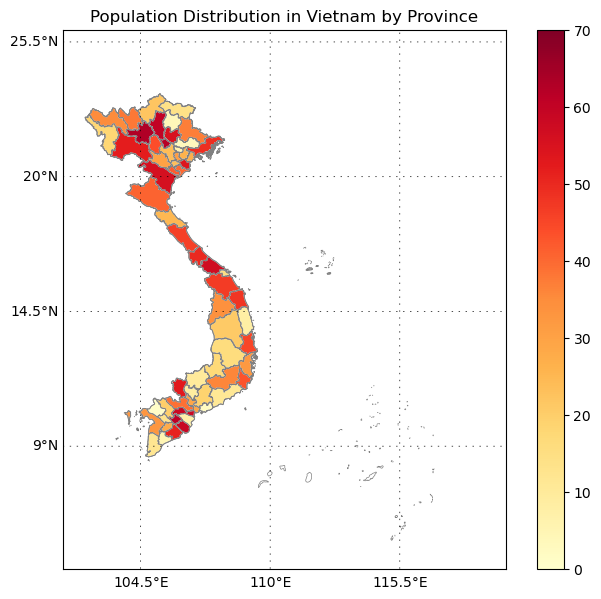

In [4]:

# Fake data about the GRDP :))
vietnam = gpd.read_file("/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1.shp")
population = arange(1, 64, 1)

# Create a figure and axis
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

lon_min = 101.2
lon_max = 120
lat_min = 4
lat_max = 26
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='gray')
map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_0', 'vietnam', linewidth=0.5, color='gray')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='gray')

vietnam.plot(column=population, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=0, vmax=70)

# Add parallels and meridians
parallels = np.arange(-90., 150., np.around((lat_max - lat_min) / 4, decimals=1))
meridians = np.arange(0., 180., np.around((lat_max - lat_min) / 4, decimals=1))
map.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=10, zorder=12)
map.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=10, zorder=12)

# Set the title and labels
ax.set_title('Population Distribution in Vietnam by Province')

# Show the map
plt.show()

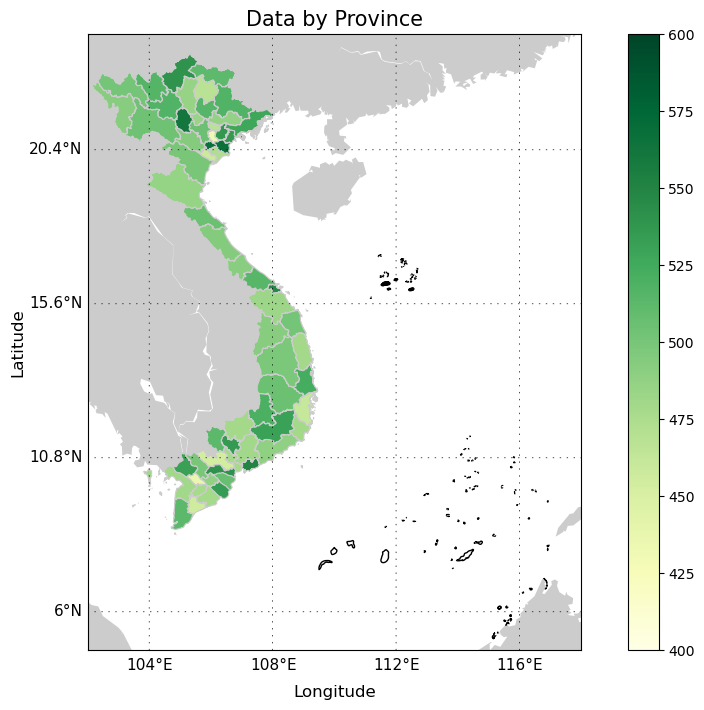

In [6]:
x_axis = arange(101, 110, 0.05)
y_axis = arange(8, 24, 0.05)

x_axis, y_axis = meshgrid(x_axis, y_axis)
random.seed(seed=180793)
data = random.randint(1, 1000, size = (size(x_axis,0), size(x_axis,1)))
x_axis = arange(101, 110, 0.05)
y_axis = arange(8, 24, 0.05)

poly_list = []
for shape in sf.shapes():
    poly = Polygon(shape.points)
    

    poly_list.append(poly)
bound_list = []
for i in range(len(sf.shapes())):
    bound = sf.shapes()[i].bbox
    bound_list.append(bound)

data_list = [[] for i in range(63)]
for i in range(len(poly_list)):
    for j in range(len(x_axis)):
        if x_axis[j] < bound_list[i][2] and x_axis[j] > bound_list[i][0]:
            for k in range(len(y_axis)):
                if y_axis[k] < bound_list[i][3] and y_axis[k] > bound_list[i][1]:
                    if poly_list[i].contains_point((x_axis[j], y_axis[k])):
                        data_list[i].append(data[k][j])
                elif y_axis[k] > bound_list[i][3]:
                    break
        elif x_axis[j] > bound_list[i][2]:
            break

data_by_province = []
for i in range(len(data_list)):
  mean_val = sum(data_list[i]) / len(data_list[i])
  data_by_province.append(mean_val)
data_by_province = array(data_by_province)


# Create a figure and axis
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a shapefile of Vietnam's provinces (replace with a real shapefile)
vietnam = gpd.read_file("/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1.shp")

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

lon_min = 102
lon_max = 118
lat_min = 4.8
lat_max = 24


map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='l',epsg=4326)


parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 
meridians = arange(0.,180., around((lon_max-lon_min)/4, decimals=1))

map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=11, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=11, zorder=12)

map2.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao',
    linewidth=1, color='k')


map2.fillcontinents()

# Plot the map with color-coded provinces
vietnam.plot(column=data_by_province, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin = 400, vmax = 600)
cbar = ax.get_figure().get_axes()[1]

# Set the title and labels
ax.set_title('Data by Province', fontsize=15)
ax.set_xlabel('Longitude', labelpad=25, size = 12)
ax.set_ylabel('Latitude', labelpad=45, size = 12)

# Show the map
plt.show()
#################################